In [ ]:
# python과 mysql을 연동시켜주는 모듈
# !pip install pymysql

In [1]:
# 상관관계 시각화
!pip install heatmapz

In [2]:
import pymysql
import pandas as pd

In [11]:
try:
    conn = pymysql.connect(
        host = 'localhost',
        port = 3306, 
        user = 'guest', 
        passwd = 'guest',
        db = 'mydata',
        cursorclass = pymysql.cursors.DictCursor) # db 조회결과를 dictionary로 저장
    cur = conn.cursor()
    
    # 데이터 
    sql = 'select * from mydata.dataset'
    cur.execute(sql)
    result = cur.fetchall()

    print(result[0])
    
    # 데이터를 데이터프레임으로 가져옴
    df = pd.DataFrame(result) 
    print(df.columns)
    print(df.head())

except conn.Error as e:
    print('ERROR %d:%s' % (e.args[0],e.args[1]))

#db랑 연결 끊기
finally:
    conn.close()

{'PassengerId': 1, 'Survived': 0, 'Pclass': 3, 'Name': 'Braund, Mr. Owen Harris', 'Sex': 'male', 'Age': 22, 'SibSp': 1, 'Parch': 0, 'Ticket': 'A/5 21171', 'Fare': 7.25, 'Cabin': '', 'Embarked': 'S'}
Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex  Age  SibSp  \
0                            Braund, Mr. Owen Harris    male   22      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female   38      1   
2                             Heikkinen, Miss. Laina  female   26      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female   35      1   
4                           Allen, Mr. William Henr

2) 분석할 변수 가져오기

In [13]:
data_m = df[['Survived','Age','SibSp','Parch','Fare','Sex']].copy()
data_m.head()

,Survived,Age,SibSp,Parch,Fare,Sex
0,0,22,1,0,7.2500,male
1,1,38,1,0,71.2833,female
2,1,26,0,0,7.9250,female
3,1,35,1,0,53.1000,female
4,0,35,0,0,8.0500,male


3) 문자열 숫자로 변경

In [15]:
data_m.loc[:,'Sex']  = data_m['Sex'].map({'female':1,'male':0})
data_m.head()

,Survived,Age,SibSp,Parch,Fare,Sex
0,0,22,1,0,7.2500,0
1,1,38,1,0,71.2833,1
2,1,26,0,0,7.9250,1
3,1,35,1,0,53.1000,1
4,0,35,0,0,8.0500,0


4) 상관계수 구하기
* 상관관계 볼 때 히트맵

In [16]:
data_m.corr()

,Survived,Age,SibSp,Parch,Fare,Sex
Survived,1.000000,-0.077729,-0.017358,0.093317,0.268189,0.538826
Age,-0.077729,1.000000,-0.308443,-0.189214,0.095688,-0.093555
SibSp,-0.017358,-0.308443,1.000000,0.383820,0.138329,0.103950
Parch,0.093317,-0.189214,0.383820,1.000000,0.205119,0.246972
Fare,0.268189,0.095688,0.138329,0.205119,1.000000,0.184994
Sex,0.538826,-0.093555,0.103950,0.246972,0.184994,1.000000


5) 상관관계 시각화 하기

In [26]:
from heatmap import corrplot
import seaborn as sns
import matplotlib.pyplot as plt



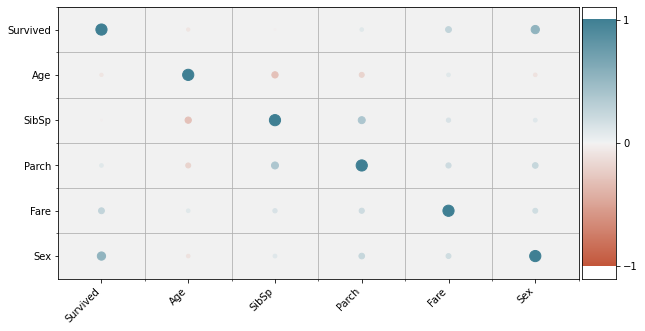

In [27]:
plt.figure(figsize = (10,5),facecolor = 'white')
corr = data_m.corr() # 상관계수 계산하기
corrplot(corr,marker = '.') # 상관 계수 시각화 

<AxesSubplot:>

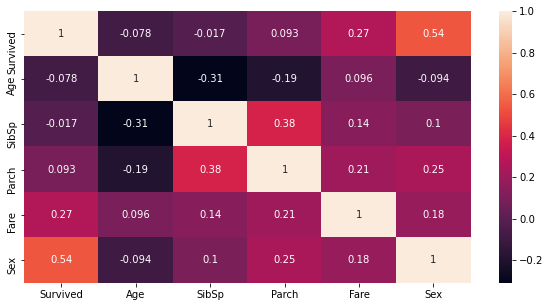

In [28]:
# 더 유용한 방법 (seaborn이용)
plt.figure(figsize = (10,5),facecolor = 'white')
sns.heatmap(corr, annot = True)